<a href="https://colab.research.google.com/github/bbchen33/Machine-Learning/blob/master/Online_ML_with_CREME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python package Creme can be used for online (incremental) machine learning. https://creme-ml.github.io/index.html

In [0]:
pip install creme

     |████████████████████████████████| 1.2MB 2.8MB/s 


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import creme
import sklearn


In [0]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
import pandas as pd
df = pd.read_csv('sample_data/california_housing_train.csv')

In [0]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
X, y = df[['housing_median_age', 'total_rooms']], df['median_house_value']

In [0]:
from creme import stream
from creme import preprocessing
from creme import linear_model
from creme import optim
from creme import metrics
import itertools

scaler = preprocessing.StandardScaler()
model = linear_model.LinearRegression()
metric = metrics.MAE()

y_true = []
y_pred = []
for xi, yi in stream.iter_pandas(X, y):
  xi_scaled = scaler.fit_one(xi).transform_one(xi)
  yi_pred = model.predict_one(xi_scaled)
  model.fit_one(xi_scaled, yi)
  y_true.append(yi)
  y_pred.append(yi_pred)
  metric.update(yi, yi_pred)


In [0]:
metric

MAE: 70559.906062

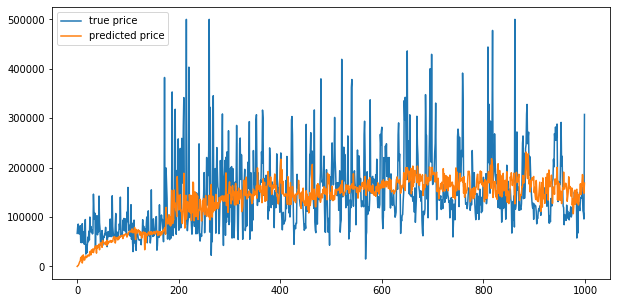

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_true[:1000], label = 'true price')
plt.plot(y_pred[:1000], label = 'predicted price')

plt.legend()

You can see it is a lot of variations but in general the prediction follows the right trend.

In [0]:
scaler = preprocessing.StandardScaler()
model = linear_model.LinearRegression(intercept_lr=0.1)
metric = metrics.MAE()
y_true = []
y_pred = []
for xi, yi in stream.iter_pandas(X, y):
  xi_scaled = scaler.fit_one(xi).transform_one(xi)
  yi_pred = model.predict_one(xi_scaled)
  model.fit_one(xi_scaled, yi)
  y_true.append(yi)
  y_pred.append(yi_pred)
  metric.update(yi, yi_pred)

In [0]:
metric

MAE: 59529.904531

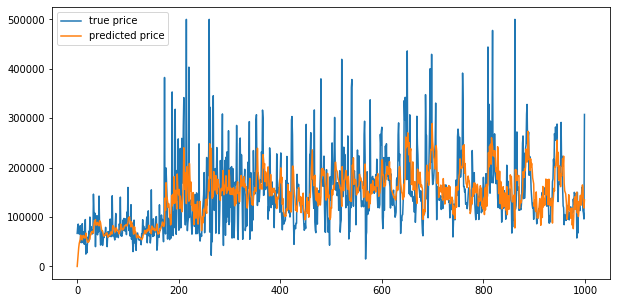

In [0]:
plt.figure(figsize=(10,5))
plt.plot(y_true[:1000], label = 'true price')
plt.plot(y_pred[:1000], label = 'predicted price')

plt.legend()

By simply changing the intercept learning, the model is doing better.